In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pymongo import MongoClient
import datetime

In [2]:
timeSeriesData = pd.DataFrame(columns=['symbol','date','cur_price','trade_quantity','updown_rate'])

In [3]:
client = MongoClient('mongodb://127.0.0.1:27017/')
db = client['mph']
# print(db)
collection_price = db['crypto_prices']

In [4]:
price_data = collection_price.find({'symbol':'ICX'})

In [5]:
index = 0

for price_detail in price_data:
    timeSeriesData.loc[index, 'symbol'] = price_detail['symbol']
    timeSeriesData.loc[index,'date']= price_detail['date']
    timeSeriesData.loc[index, 'cur_price'] = price_detail['cur_price']
    timeSeriesData.loc[index, 'trade_quantity'] = price_detail['trade_quantity']/10000000 # OMG Normalization
    timeSeriesData.loc[index, 'updown_rate'] = price_detail['updown_rate']
    index+=1

In [6]:
timeSeriesData = timeSeriesData.sort_values(['date'])

In [13]:
startDate1 = "2018-03-02"
#startDate1 = "2019-03-02"
endDate1 = "2019-12-04"

startDate = datetime.datetime.strptime(startDate1,"%Y-%m-%d")
endDate = datetime.datetime.strptime(endDate1,"%Y-%m-%d")

In [14]:
monthDate = startDate +pd.DateOffset(months=3)

In [15]:
timeSeriesData1 = timeSeriesData.loc[(timeSeriesData['date'] >= startDate) & (timeSeriesData['date'] <= endDate), :]

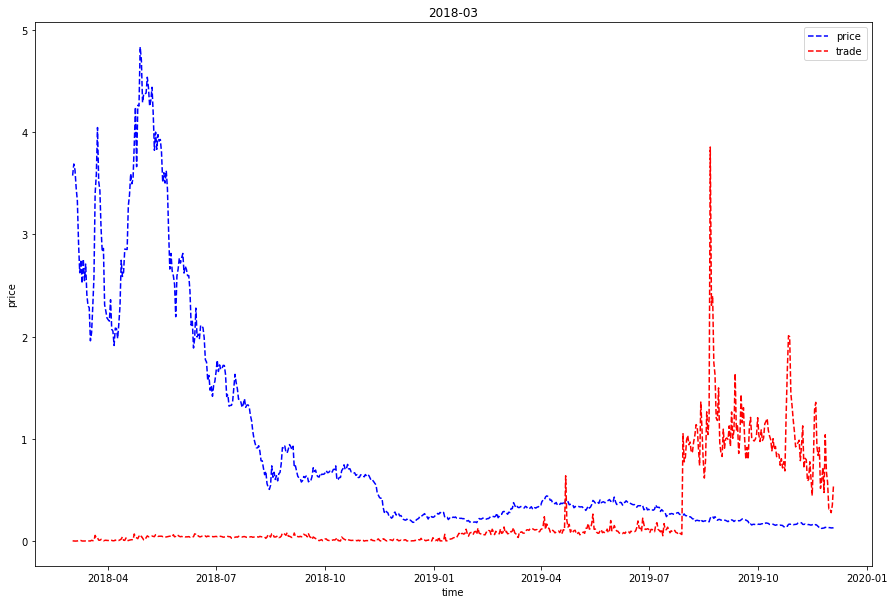

In [16]:
plt.figure(figsize=(15,10))
plt.plot(timeSeriesData1['date'].values, timeSeriesData1['cur_price'].values,'b--')
#plt.plot(timeSeriesCountData1['date'].values, timeSeriesCountData1['count'].values, 'ro')
plt.plot(timeSeriesData1['date'].values, timeSeriesData1['trade_quantity'].values, 'r--')
plt.title(startDate.strftime('%Y-%m'))
plt.xlabel('time')
plt.ylabel('price')
plt.legend(['price','trade','downhill'])
plt.show()

In [17]:
total=pd.concat([timeSeriesData1[['cur_price']],timeSeriesData1[['trade_quantity']]],1)
total

,cur_price,trade_quantity
642,3.57279,0.002184
641,3.68611,0.002848
640,3.6271,0.001195
639,3.45055,0.001279
638,3.32557,0.002399
...,...,...
4,0.13298,0.315
3,0.13249,0.319
2,0.12944,0.279
1,0.13105,0.353


In [18]:
total['cur_price'] = pd.to_numeric(total['cur_price'], errors='coerce')
total['trade_quantity'] = pd.to_numeric(total['trade_quantity'], errors='coerce')
total.corr()

,cur_price,trade_quantity
cur_price,1.000000,-0.319078
trade_quantity,-0.319078,1.000000
